# Topic 5: Unsupervised Learning | Hidden Markov Model
A hidden Markov model is a statistical model that can be used to preresent a sequence of observations that are generated by a system that is in one of a finite number of statets. However the states of the system are hidden and are not directly observed. But the observations are assumed to be genered by the system based on its current state. 

To implement this model, we need the library hmmlearn. Furthermore we going to implement this model as a 4 component/states model. For the basis of this model, we need the starting probability of each state, then a transition matrix which indicates the probability of a state transitioning to a other state, means, and covariance. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm
import warnings

warnings.filterwarnings("ignore")

# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0, 0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))


Now we want to acutally define our model via `hmmlearn` library. 

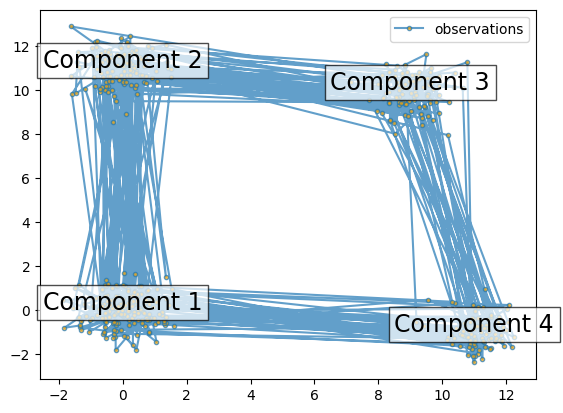

In [12]:
# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full",random_state=0)

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    ax.text(m[0], m[1], 'Component %i' % (i + 1),
            size=17, horizontalalignment='center',
            bbox=dict(alpha=.7, facecolor='w'))
ax.legend(loc='best')
fig.show()
plt.show()


Now we want to define our model and train it. Afterwards we plot the predictions and print te scores. 

Converged: True Score: -1165.6246912807778
Converged: True Score: -1165.334366567227
Converged: True Score: -1151.5312456536021
Converged: True Score: -1181.7434751491971
Converged: True Score: -1151.5312456536005
Converged: True Score: -1151.5312456535942
Converged: True Score: -1151.531245653604
Converged: True Score: -1056.208855635567
Converged: True Score: -1151.531245653593
Converged: True Score: -1132.587228525501
Converged: True Score: -1043.7019006145422
Converged: True Score: -1096.5607449405181
Converged: True Score: -1151.2752061451433
Converged: True Score: -1096.5607422211153
Converged: True Score: -1098.8792532871712
Converged: True Score: -1084.6006244920602
Converged: True Score: -1096.5607449405252
Converged: True Score: -1096.2080415719392
Converged: True Score: -1047.6059612735485
Converged: True Score: -1096.5589699003317
Converged: True Score: -1030.268904806388
Converged: True Score: -1107.6461108388912
Converged: True Score: -1104.7230259035414
Converged: True S

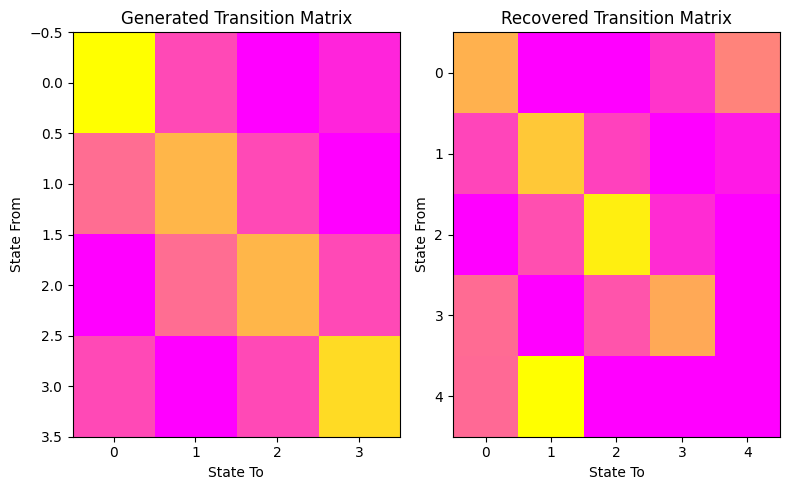

In [13]:
scores = list()
models = list()
for n_components in (3, 4, 5):
    for idx in range(10):
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components,
                                covariance_type='full',
                                random_state=idx+1,)
        model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
        models.append(model)
        scores.append(model.score(X[X.shape[0] // 2:]))
        print('Converged:' , model.monitor_.converged, 'Score:', scores[-1])




# get the best model
model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')



# plot the transition matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
plt.show()